In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
bench = pd.read_csv('./benchpress_coords.csv')
squat = pd.read_csv('./squat_coords_3.csv')
deadlift = pd.read_csv('./deadlift_coords.csv')

In [4]:
squat.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,correct,0.463919,0.208369,-0.245507,0.999996,0.468367,0.196130,-0.234128,0.999984,0.471554,...,0.119802,0.906513,0.513046,0.776716,0.046514,0.990420,0.427701,0.781255,0.027897,0.991347
1,correct,0.465539,0.212332,-0.222241,0.999996,0.469520,0.199542,-0.209930,0.999984,0.472353,...,0.123294,0.915655,0.512742,0.777440,0.038048,0.991636,0.427964,0.781348,0.031822,0.992456
2,correct,0.465754,0.214787,-0.220204,0.999996,0.469770,0.201180,-0.207949,0.999984,0.472553,...,0.124158,0.918240,0.512601,0.777515,0.039266,0.991949,0.428193,0.781155,0.033205,0.992738


In [5]:

def calculateAngle(a, b, c):
    a = np.array(a)  
    b = np.array(b) 
    c = np.array(c) 

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(
        a[1] - b[1], a[0] - b[0]
    )
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

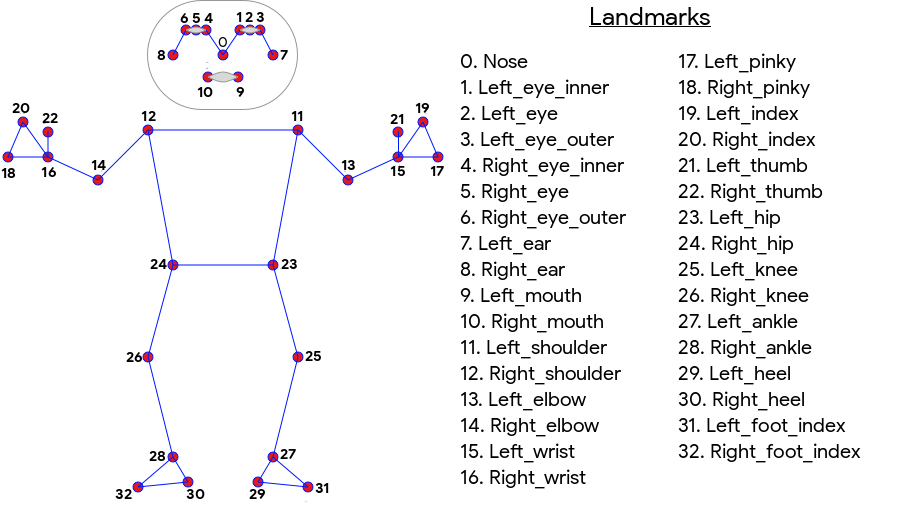

In [6]:
def extract_joint_coordinates(df):
    nose = []
    left_shoulder = []
    left_elbow = []
    left_wrist = []
    left_hip = []
    left_knee = []
    left_ankle = []
    left_heel = []
    right_shoulder = []
    right_elbow = []
    right_wrist = []
    right_hip = []
    right_knee = []
    right_ankle = []
    right_heel = []

    for i in range(len(df)):
        nose.append([df['x1'].values[i], df['y1'].values[i]])
        left_shoulder.append([df['x12'].values[i], df['y12'].values[i]])
        left_elbow.append([df['x14'].values[i], df['y14'].values[i]])
        left_wrist.append([df['x16'].values[i], df['y16'].values[i]])
        left_hip.append([df['x26'].values[i], df['y26'].values[i]])
        left_knee.append([df['x28'].values[i], df['y28'].values[i]])
        left_ankle.append([df['x30'].values[i], df['y30'].values[i]])
        left_heel.append([df['x32'].values[i], df['y32'].values[i]])
        right_shoulder.append([df['x13'].values[i], df['y13'].values[i]])
        right_elbow.append([df['x15'].values[i], df['y15'].values[i]])
        right_wrist.append([df['x17'].values[i], df['y17'].values[i]])
        right_hip.append([df['x27'].values[i], df['y27'].values[i]])
        right_knee.append([df['x29'].values[i], df['y29'].values[i]])
        right_ankle.append([df['x31'].values[i], df['y31'].values[i]])
        right_heel.append([df['x33'].values[i], df['y33'].values[i]])

    return nose, left_shoulder, left_elbow, left_wrist, left_hip, left_knee, left_ankle, left_heel, right_shoulder, right_elbow, right_wrist, right_hip, right_knee, right_ankle, right_heel

In [ ]:

nose, left_shoulder, left_elbow, left_wrist, left_hip, left_knee, left_ankle, left_heel, right_shoulder, right_elbow, right_wrist, right_hip, right_knee, right_ankle, right_heel = extract_joint_coordinates(bench)


print("Nose:", nose[:5])
print("Left shoulder:", left_shoulder[:5])
print("Left elbow:", left_elbow[:5])
print("Left wrist:", left_wrist[:5])
print("Left hip:", left_hip[:5])
print("Left knee:", left_knee[:5])
print("Left ankle:", left_ankle[:5])
print("Left heel:", left_heel[:5])
print("Right shoulder:", right_shoulder[:5])
print("Right elbow:", right_elbow[:5])
print("Right wrist:", right_wrist[:5])
print("Right hip:", right_hip[:5])
print("Right knee:", right_knee[:5])
print("Right ankle:", right_ankle[:5])
print("Right heel:", right_heel[:5])

Nose: [[0.342405319, 0.293186635], [0.347208589, 0.290650994], [0.338909209, 0.297234207], [0.342314661, 0.286978781], [0.337070137, 0.29207471]]
Left shoulder: [[0.441123724, 0.33863911], [0.448362559, 0.342661023], [0.453106374, 0.344025701], [0.43198657, 0.343415648], [0.456074268, 0.342719615]]
Left elbow: [[0.542586923, 0.260587037], [0.537568986, 0.402204007], [0.569633663, 0.355730087], [0.521948993, 0.407967269], [0.545381069, 0.276529819]]
Left wrist: [[0.577421725, 0.189344153], [0.620806277, 0.429135859], [0.589851379, 0.325081736], [0.630113721, 0.437609345], [0.564352632, 0.197264731]]
Left hip: [[0.967836261, 0.436263591], [0.964532912, 0.436348557], [0.962019384, 0.43359822], [0.964699507, 0.431971014], [0.961853385, 0.431048542]]
Left knee: [[0.87232399, 0.568023145], [0.86796385, 0.565129876], [0.868311048, 0.567188025], [0.881150186, 0.56097573], [0.881468594, 0.565130293]]
Left ankle: [[0.840245664, 0.5839082], [0.838251114, 0.580659568], [0.83921814, 0.582654655], [

In [8]:
neck_angle = [(calculateAngle(left_shoulder[i], nose[i], left_hip[i]) + calculateAngle(right_shoulder[i], nose[i], right_hip[i])) / 2 for i in range(len(nose))]
left_elbow_angle = [calculateAngle(left_shoulder[i], left_elbow[i], left_wrist[i]) for i in range(len(left_shoulder))]
right_elbow_angle = [calculateAngle(right_shoulder[i], right_elbow[i], right_wrist[i]) for i in range(len(right_shoulder))]
left_shoulder_angle = [calculateAngle(left_elbow[i], left_shoulder[i], left_hip[i]) for i in range(len(left_elbow))]
right_shoulder_angle = [calculateAngle(right_elbow[i], right_shoulder[i], right_hip[i]) for i in range(len(right_elbow))]
left_hip_angle = [calculateAngle(left_shoulder[i], left_hip[i], left_knee[i]) for i in range(len(left_shoulder))]
right_hip_angle = [calculateAngle(right_shoulder[i], right_hip[i], right_knee[i]) for i in range(len(right_shoulder))]
left_knee_angle = [calculateAngle(left_hip[i], left_knee[i], left_ankle[i]) for i in range(len(left_hip))]
right_knee_angle = [calculateAngle(right_hip[i], right_knee[i], right_ankle[i]) for i in range(len(right_hip))]
left_ankle_angle = [calculateAngle(left_knee[i], left_ankle[i], left_heel[i]) for i in range(len(left_knee))]
right_ankle_angle = [calculateAngle(right_knee[i], right_ankle[i], right_heel[i]) for i in range(len(right_knee))]

print("Neck angle:", neck_angle)
print("Left elbow angle:", left_elbow_angle)
print("Right elbow angle:", right_elbow_angle)
print("Left shoulder angle:", left_shoulder_angle)
print("Right shoulder angle:", right_shoulder_angle)
print("Left hip angle:", left_hip_angle)
print("Right hip angle:", right_hip_angle)
print("Left knee angle:", left_knee_angle)
print("Right knee angle:", right_knee_angle)
print("Left ankle angle:", left_ankle_angle)
print("Right ankle angle:", right_ankle_angle)

Neck angle: [52.66332400483444, 52.169612974385146, 46.33807826915029, 52.242528272570894, 48.34841954897434, 39.28942533326622, 40.250994785942346, 46.037312200240166, 45.049550667603576, 44.694462787952524, 46.349586905290124, 42.93563274534611, 55.29749398975225, 46.33807826915029, 49.99356968208356, 44.601107264896775, 37.81994540560613, 35.192287508667036, 37.959001800844426, 43.44586450295592, 36.042000170794275, 42.497578019670925, 47.22842328341635, 49.690476874159714, 45.81698112634536, 48.85761142968918, 42.10964348896727, 33.75131807728264, 41.402142005104295, 43.728003038080686, 34.13273615435165, 34.79929614540371, 34.885983053240025, 41.85031307545713, 38.41568277513715, 30.232666076402378, 38.968347186002575, 35.28221908656825, 34.50561335584546, 27.473251938091593, 41.402142005104295, 41.11464084778749, 35.06408904673591, 31.720272470743772, 35.40579843906214, 34.885983053240025, 39.838894948261874, 32.608213310885006, 38.15688406116496, 35.55370042313424, 36.2060491789

In [9]:
def calculate_joint_angles(row):
    nose = [row['x1'], row['y1']]
    left_shoulder = [row['x12'], row['y12']]
    left_elbow = [row['x14'], row['y14']]
    left_wrist = [row['x16'], row['y16']]
    left_hip = [row['x26'], row['y26']]
    left_knee = [row['x28'], row['y28']]
    left_ankle = [row['x30'], row['y30']]
    left_heel = [row['x32'], row['y32']]
    right_shoulder = [row['x13'], row['y13']]
    right_elbow = [row['x15'], row['y15']]
    right_wrist = [row['x17'], row['y17']]
    right_hip = [row['x27'], row['y27']]
    right_knee = [row['x29'], row['y29']]
    right_ankle = [row['x31'], row['y31']]
    right_heel = [row['x33'], row['y33']]

    neck_angle = (calculateAngle(left_shoulder, nose, left_hip) + calculateAngle(right_shoulder, nose, right_hip)) / 2
    left_elbow_angle = calculateAngle(left_shoulder, left_elbow, left_wrist)
    right_elbow_angle = calculateAngle(right_shoulder, right_elbow, right_wrist)
    left_shoulder_angle = calculateAngle(left_elbow, left_shoulder, left_hip)
    right_shoulder_angle = calculateAngle(right_elbow, right_shoulder, right_hip)
    left_hip_angle = calculateAngle(left_shoulder, left_hip, left_knee)
    right_hip_angle = calculateAngle(right_shoulder, right_hip, right_knee)
    left_knee_angle = calculateAngle(left_hip, left_knee, left_ankle)
    right_knee_angle = calculateAngle(right_hip, right_knee, right_ankle)
    left_ankle_angle = calculateAngle(left_knee, left_ankle, left_heel)
    right_ankle_angle = calculateAngle(right_knee, right_ankle, right_heel)

    return pd.Series([neck_angle, left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle, left_ankle_angle, right_ankle_angle])

# 1. bench

In [111]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
bench[angle_columns] = bench.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(bench[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

bench = pd.concat([bench, scaled_angles_df], axis=1)
bench.to_csv("benchpress_with_scaled_angles.csv", index=False)

In [112]:
bench

,neck_angle,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,0.798352,0.834459,0.952596,0.266127,0.589358,0.309226,0.719395,0.746679,0.000000,0.201436,0.356445
1,0.790185,0.901100,0.243175,0.128914,0.566769,0.301976,0.700731,0.767010,0.057536,0.211560,0.400300
2,0.693722,0.608029,0.343372,0.022042,0.692120,0.311591,0.703938,0.753796,0.109665,0.205454,0.433222
3,0.791391,0.872488,0.256037,0.144443,0.520251,0.321612,0.701488,0.719240,0.106303,0.205871,0.440045
4,0.726976,0.748661,0.920769,0.257104,0.622420,0.337217,0.721753,0.717012,0.117967,0.211117,0.445948
...,...,...,...,...,...,...,...,...,...,...,...
950,0.121328,0.688277,0.807281,0.294702,0.249989,0.481005,0.481215,0.740547,0.631917,0.204217,0.253341
951,0.058925,0.636087,0.625161,0.136976,0.064538,0.467371,0.440532,0.763520,0.651636,0.212204,0.268137
952,0.110775,0.667139,0.788369,0.283431,0.255845,0.483180,0.481745,0.739896,0.635482,0.209461,0.258420
953,0.047007,0.658509,0.634395,0.135140,0.078258,0.467316,0.442172,0.762767,0.662453,0.213641,0.273887


# Squat

In [10]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
squat[angle_columns] = squat.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(squat[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

squat = pd.concat([squat, scaled_angles_df], axis=1)
squat.to_csv("squat_with_scaled_angles_3.csv", index=False)
squat

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,correct,0.463919,0.208369,-0.245507,0.999996,0.468367,0.196130,-0.234128,0.999984,0.471554,...,0.964113,0.964700,0.318762,0.342257,0.766274,0.684814,0.470398,0.258307,0.524342,0.273121
1,correct,0.465539,0.212332,-0.222241,0.999996,0.469520,0.199542,-0.209930,0.999984,0.472353,...,0.952262,0.954404,0.345010,0.385914,0.788277,0.699875,0.503967,0.218444,0.584371,0.250407
2,correct,0.465754,0.214787,-0.220204,0.999996,0.469770,0.201180,-0.207949,0.999984,0.472553,...,0.946314,0.949870,0.360417,0.398928,0.800312,0.704215,0.509119,0.217142,0.592909,0.253007
3,correct,0.466117,0.217523,-0.210944,0.999996,0.470261,0.203596,-0.198651,0.999984,0.472955,...,0.942103,0.945718,0.368104,0.408538,0.808862,0.713261,0.519198,0.208793,0.593419,0.248911
4,correct,0.466443,0.220684,-0.203541,0.999996,0.470690,0.207197,-0.191198,0.999985,0.473327,...,0.935023,0.944145,0.377292,0.403278,0.845372,0.723739,0.537930,0.202203,0.579687,0.244833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,Trunk leaning foward,0.500232,0.405325,-0.301385,0.999997,0.504331,0.393444,-0.299639,0.999994,0.506599,...,0.986812,0.953855,0.208004,0.176284,0.903478,0.903874,0.534137,0.520012,0.228117,0.234803
1430,Trunk leaning foward,0.500527,0.394290,-0.289437,0.999997,0.504572,0.381850,-0.287967,0.999994,0.506802,...,0.987865,0.952025,0.186187,0.180797,0.824227,0.936149,0.519845,0.484015,0.206464,0.224745
1431,Trunk leaning foward,0.500996,0.382366,-0.297792,0.999997,0.505023,0.371066,-0.295604,0.999993,0.507186,...,0.991982,0.950631,0.148877,0.185478,0.713760,0.963467,0.512349,0.433261,0.193272,0.216665
1432,Trunk leaning foward,0.501645,0.366957,-0.317087,0.999995,0.505714,0.354907,-0.313640,0.999989,0.507797,...,0.992120,0.949166,0.141591,0.193431,0.690569,0.992245,0.498479,0.385750,0.167702,0.217822


In [11]:
col_list = squat.columns.tolist()
print(col_list)

['class', 'x1', 'y1', 'z1', 'v1', 'x2', 'y2', 'z2', 'v2', 'x3', 'y3', 'z3', 'v3', 'x4', 'y4', 'z4', 'v4', 'x5', 'y5', 'z5', 'v5', 'x6', 'y6', 'z6', 'v6', 'x7', 'y7', 'z7', 'v7', 'x8', 'y8', 'z8', 'v8', 'x9', 'y9', 'z9', 'v9', 'x10', 'y10', 'z10', 'v10', 'x11', 'y11', 'z11', 'v11', 'x12', 'y12', 'z12', 'v12', 'x13', 'y13', 'z13', 'v13', 'x14', 'y14', 'z14', 'v14', 'x15', 'y15', 'z15', 'v15', 'x16', 'y16', 'z16', 'v16', 'x17', 'y17', 'z17', 'v17', 'x18', 'y18', 'z18', 'v18', 'x19', 'y19', 'z19', 'v19', 'x20', 'y20', 'z20', 'v20', 'x21', 'y21', 'z21', 'v21', 'x22', 'y22', 'z22', 'v22', 'x23', 'y23', 'z23', 'v23', 'x24', 'y24', 'z24', 'v24', 'x25', 'y25', 'z25', 'v25', 'x26', 'y26', 'z26', 'v26', 'x27', 'y27', 'z27', 'v27', 'x28', 'y28', 'z28', 'v28', 'x29', 'y29', 'z29', 'v29', 'x30', 'y30', 'z30', 'v30', 'x31', 'y31', 'z31', 'v31', 'x32', 'y32', 'z32', 'v32', 'x33', 'y33', 'z33', 'v33', 'neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 

# Deadlift

In [113]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
deadlift[angle_columns] = deadlift.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(deadlift[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

deadlift = pd.concat([deadlift, scaled_angles_df], axis=1)
deadlift.to_csv("deadlift_with_scaled_angles.csv", index=False)
deadlift

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,d_correct_down,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.950996,0.913755,0.330785,0.072821,0.911086,0.523603,0.723386,0.641266,0.253202,0.188200
1,d_correct_down,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.958239,0.949642,0.319952,0.298021,0.974792,0.436400,0.859024,0.313937,0.382163,0.008144
2,d_correct_down,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.812687,0.915737,0.437200,0.056541,0.573249,0.619935,0.644051,0.755962,0.332946,0.229628
3,d_correct_up,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,0.950257,0.702023,0.360936,0.238497,0.805906,0.684383,0.470151,0.964177,0.173505,0.454810
4,d_correct_up,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,0.867695,0.856630,0.376617,0.257785,0.956371,0.600696,0.615876,0.918872,0.238097,0.495850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,d_arms_narrow_down,0.423258,0.467540,-0.738914,0.999999,0.442992,0.451831,-0.747274,0.999997,0.453844,...,0.561735,0.886898,0.295301,0.367973,0.736614,0.844911,0.763663,0.682993,0.713810,0.336401
1136,d_arms_narrow_down,0.419347,0.455804,-0.551248,0.999999,0.440416,0.439564,-0.561443,0.999997,0.450906,...,0.522973,0.890998,0.302985,0.337825,0.739958,0.839972,0.661376,0.689986,0.633226,0.354367
1137,d_arms_narrow_down,0.412521,0.476321,-0.622205,0.999999,0.431973,0.462884,-0.633574,0.999997,0.442958,...,0.621398,0.884177,0.264897,0.417728,0.733090,0.755522,0.742157,0.711764,0.652813,0.365253
1138,d_arms_narrow_down,0.411704,0.494523,-0.582164,0.999999,0.431118,0.480473,-0.596455,0.999998,0.441991,...,0.686024,0.892699,0.318695,0.381109,0.624793,0.820471,0.779375,0.675796,0.720624,0.337550
